In [ ]:
import pandas as pd

In [13]:
df = pd.read_csv('/Users/john/Desktop/Tesla/data.csv')

In [44]:
df.head()

,Response Date,Email,Distribution Date\n,Commissioning Date,Country,Name,Transaction Entity,Installer Company,Project Name,Project Type,...,How can we improve the sales process? Select all that apply,"How would you rate the installation process? \n(1 = Poor, 5 = Excellent)",How can we improve the installation process? Select all that apply,Please explain:.2,What has been your experience with the Tesla App? Select all that apply,What is preventing you from using the Tesla App?,We would like your candid feedback on how we can improve. Please provide any additional thoughts below.,We would like to invite you to participate in the Tesla Customer Experience Program. (Y/N),Date Difference,Installation Satisfaction
0,19-Sep-18,***Removed***,2018-09-19,2018-09-04,AU,***Removed***,CI,***Removed***,***Removed***,Powerwall,...,NaN,5.0,NaN,NaN,I love it,NaN,Make it available via the web portal as well.,Yes,15,5.0
1,19-Sep-18,***Removed***,2018-09-19,2018-08-08,US,***Removed***,CI,***Removed***,***Removed***,Powerwall,...,NaN,5.0,NaN,NaN,I wish there was more information on how to us...,NaN,NaN,Yes,42,5.0
2,19-Sep-18,***Removed***,2018-09-19,2018-08-28,AU,***Removed***,CI,***Removed***,***Removed***,Powerwall,...,NaN,5.0,NaN,NaN,It's difficult to find and check my historic e...,NaN,Better historical usage information would be g...,Yes,22,5.0
3,19-Sep-18,***Removed***,2018-09-19,2018-08-30,AU,***Removed***,CI,***Removed***,***Removed***,Powerwall,...,NaN,5.0,NaN,NaN,I love it,NaN,Our Powerwall 2 was fitted 3 weeks ago. Batter...,Yes,20,5.0
4,19-Sep-18,***Removed***,2018-09-19,2018-09-12,AU,***Removed***,CI,***Removed***,***Removed***,Powerwall,...,NaN,4.0,Communication before the start of work,NaN,I love it,NaN,NaN,No,7,4.0


In [ ]:
df.dtypes

In [20]:
df['Distribution Date\n'] = pd.to_datetime(df['Distribution Date\n'], format='%Y-%m-%d', errors='coerce')
df['Commissioning Date'] = pd.to_datetime(df['Commissioning Date'], format='%Y-%m-%d', errors='coerce')

In [41]:
df['Date Difference'] = abs((df['Commissioning Date'] - df['Distribution Date\n']).dt.days)


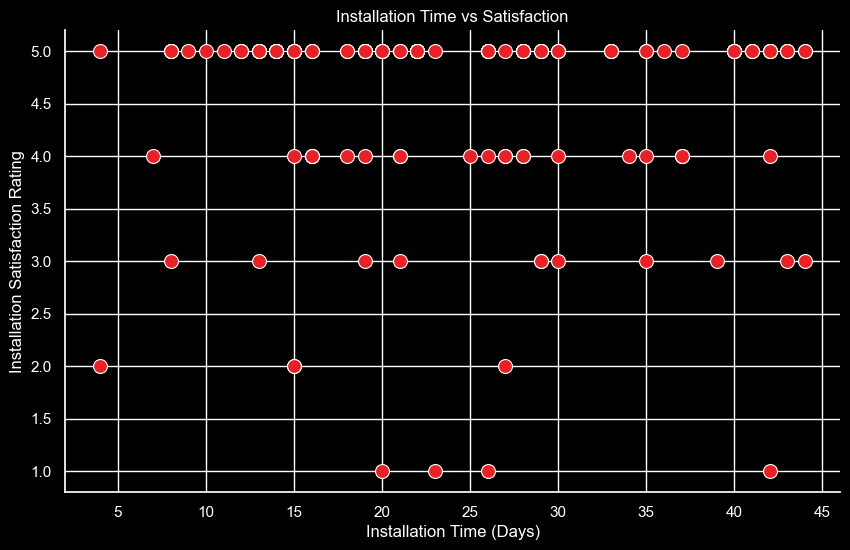

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a dark background style
plt.style.use('dark_background')

# Define the red color for points
tesla_red = '#e82127'

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='Date Difference', y='Installation Satisfaction', color=tesla_red, s=100)

# Set plot title and labels with white color
plt.title('Installation Time vs Satisfaction', color='white')
plt.xlabel('Installation Time (Days)', color='white')
plt.ylabel('Installation Satisfaction Rating', color='white')

# Set the color of the ticks to white
scatter.tick_params(colors='white')

# Remove the top and right spines
scatter.spines['top'].set_visible(False)
scatter.spines['right'].set_visible(False)

# Change the color of the remaining spines to white
scatter.spines['left'].set_color('white')
scatter.spines['bottom'].set_color('white')

# Display the plot
plt.show()


In [69]:
correlation = df[['Date Difference', 'How would you rate the installation process?  \n(1 = Poor, 5 = Excellent)']].corr()
print(correlation)

                                                    Date Difference  \
Date Difference                                            1.000000   
How would you rate the installation process?  \...        -0.025353   

                                                    How would you rate the installation process?  \n(1 = Poor, 5 = Excellent)  
Date Difference                                                                             -0.025353                          
How would you rate the installation process?  \...                                           1.000000                          


In [53]:
def get_column_names(df):
    return df.columns.tolist()

['Response Date', 'Email', 'Distribution Date\n', 'Commissioning Date', 'Country', 'Name', 'Transaction Entity', 'Installer Company', 'Project Name', 'Project Type', 'Serial Numbers', 'Site Number', 'How would you rate your overall Powerwall experience from purchase to your system coming online?  (1 = Poor, 5 = Excellent)', 'Why did you purchase Powerwall?  Select all that apply (EMEA Version)', 'Why did you purchase Powerwall?  Select all that apply\n(APAC/NA Version)', 'Please explain:', 'Before installation, did you get enough information about Powerwall and features?', 'Please explain:.1', 'How would you rate the sales process?  \n(1 = Poor, 5 = Excellent)', 'How can we improve the sales process? Select all that apply', 'How would you rate the installation process?  \n(1 = Poor, 5 = Excellent)', 'How can we improve the installation process? Select all that apply', 'Please explain:.2', 'What has been your experience with the Tesla App? Select all that apply', 'What is preventing you

[('tesla', 10), ('installation', 7), ('installed', 7), ('install', 7), ('day', 6), ('issue', 5), ('system', 5), ('work', 5), ('would', 5), ('process', 4)]
Average Sentiment: -0.06387666671351735


[nltk_data] Downloading package stopwords to /Users/john/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


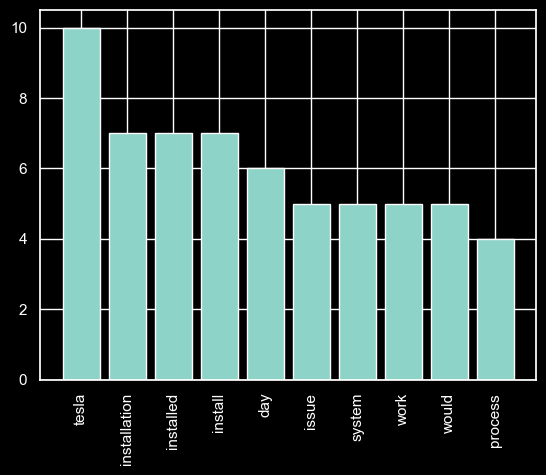

In [74]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

csat_data_df = df

installation_feedback = csat_data_df['Please explain:.2'].dropna().str.lower()

nltk.download('stopwords')
stop = stopwords.words('english')
installation_feedback = installation_feedback.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

vectorizer = CountVectorizer(max_features=50) # Adjust the number of words
word_count = vectorizer.fit_transform(installation_feedback)
sum_words = word_count.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

top_words = words_freq[:10]  # Adjust for the number of top words you want to display
print(top_words)

installation_feedback_sentiment = installation_feedback.apply(lambda x: TextBlob(x).sentiment.polarity)

# Display average sentiment
average_sentiment = installation_feedback_sentiment.mean()
print(f'Average Sentiment: {average_sentiment}')

top_words_dict = dict(top_words)
plt.bar(top_words_dict.keys(), top_words_dict.values())
plt.xticks(rotation=90)
plt.show()


In [78]:
# Filter the rows where the specified column contains the word 'issue'
rows_with_issues = csat_data_df[csat_data_df['Please explain:.2'].str.contains('issue', na=False, case=False)]

print(rows_with_issues)


    Response Date          Email Distribution Date\n Commissioning Date  \
5       19-Sep-18  ***Removed***          2018-09-19         2018-09-06   
106     28-Aug-18  ***Removed***          2018-08-06         2018-08-02   
114     26-Aug-18  ***Removed***          2018-08-22         2018-07-26   

    Country           Name Transaction Entity Installer Company  \
5        AU  ***Removed***                CI      ***Removed***   
106      US  ***Removed***     Direct (Tesla)     ***Removed***   
114      AU  ***Removed***                CI      ***Removed***   

      Project Name Project Type  ...  \
5    ***Removed***    Powerwall  ...   
106  ***Removed***    Powerwall  ...   
114  ***Removed***    Powerwall  ...   

    How would you rate the installation process?  \n(1 = Poor, 5 = Excellent)  \
5                                                  3.0                          
106                                                2.0                          
114                       

In [91]:
print(df['What has been your experience with the Tesla App? Select all that apply'].head())

1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
141    NaN
142    NaN
143    NaN
144    NaN
145    NaN
Name: What is preventing you from using the Tesla App?, Length: 143, dtype: object


In [85]:
unique_responses = set()
for responses in df['What has been your experience with the Tesla App? Select all that apply'].dropna():
    unique_responses.update([resp.strip() for resp in responses.split(',')])

for response in unique_responses:
    df[response] = df['What has been your experience with the Tesla App? Select all that apply'].apply(lambda x: 1 if response in str(x) else 0)

correlations = {}
for response in unique_responses:
    correlations[response] = df['Overall Powerwall Experience Rating'].corr(df[response])

correlations


{"It's difficult to find and check my historic energy use": -0.1325699641494799,
 "I don't use the app": -0.0758194759741483,
 'I love it': 0.31229672674620756,
 'I wish there was more information on how to use it': -0.2885003388569604}

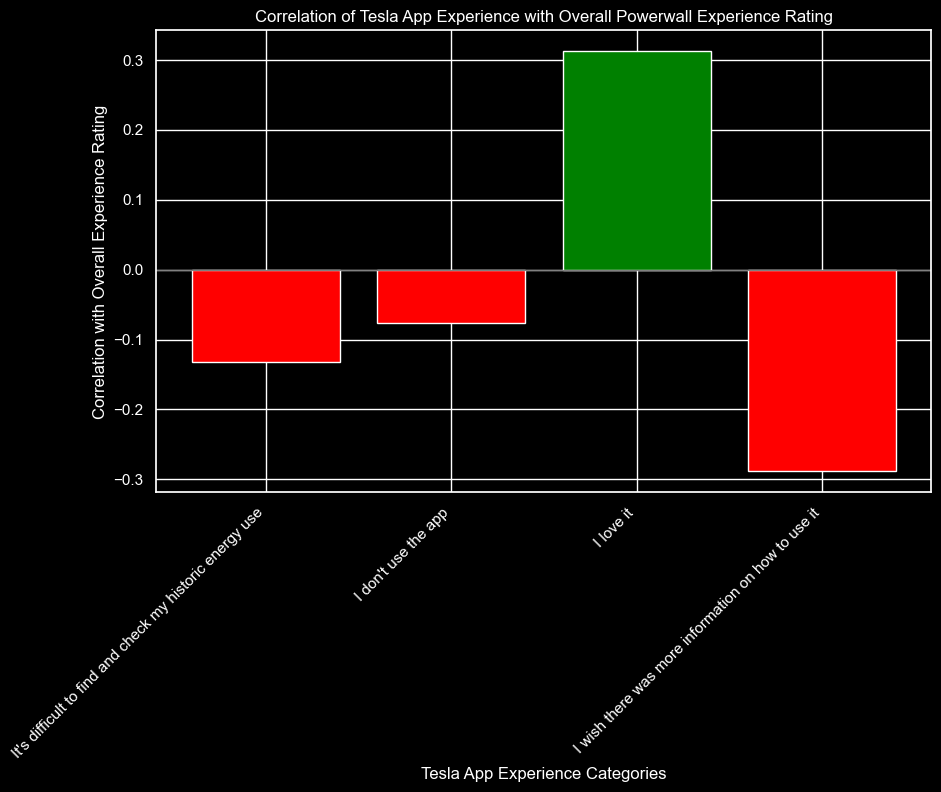

In [86]:
import matplotlib.pyplot as plt

# Assuming 'correlations' is the dictionary containing your correlation results
correlations = {
    "It's difficult to find and check my historic energy use": -0.1325699641494799,
    "I don't use the app": -0.0758194759741483,
    'I love it': 0.31229672674620756,
    'I wish there was more information on how to use it': -0.2885003388569604
}

# Create a bar chart
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.bar(correlations.keys(), correlations.values(), color=['red', 'red', 'green', 'red'])  # Using red for negative, green for positive
plt.xlabel('Tesla App Experience Categories')
plt.ylabel('Correlation with Overall Experience Rating')
plt.title('Correlation of Tesla App Experience with Overall Powerwall Experience Rating')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.axhline(0, color='gray', linewidth=0.8)  # Add a line at y=0 for reference
plt.show()


In [106]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

app_feedback = df['What is preventing you from using the Tesla App?'].dropna().str.lower()

# Remove stopwords
app_feedback = app_feedback.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

word_count = vectorizer.fit_transform(app_feedback)
sum_words = word_count.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Visualize top words
top_words = dict(words_freq[:10]) 
plt.figure(figsize=(10,6))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Top Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Tesla App Feedback')
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to /Users/john/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [116]:
app_use_issues = df[df['What is preventing you from using the Tesla App?'].notna()]

# Display the relevant entries
print(app_use_issues['What is preventing you from using the Tesla App?'])

105    We don't use apps. We are not computer literat...
107                                 do not know about it
Name: What is preventing you from using the Tesla App?, dtype: object


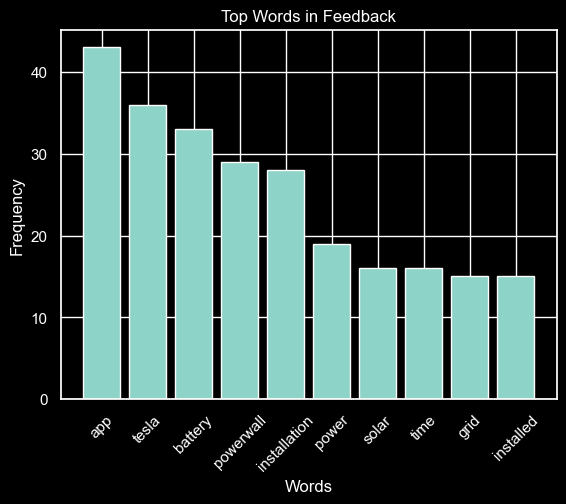

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

# Extracting themes
vectorizer = CountVectorizer(stop_words='english', max_features=10)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['We would like your candid feedback on how we can improve. Please provide any additional thoughts below.'].dropna())

# Summarize and sort most common words
word_counts = np.asarray(X.sum(axis=0)).flatten()
words = np.array(vectorizer.get_feature_names_out())
word_freq = dict(zip(words, word_counts))
word_freq_sorted = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)

# Visualize the most common words
plt.bar([word[0] for word in word_freq_sorted], [word[1] for word in word_freq_sorted])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words in Feedback')
plt.xticks(rotation=45)
plt.show()


In [124]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('/Users/john/Desktop/Tesla/Data/CSAT Data - Confidential.csv')
df['Info_Provided_Flag'] = df['Before installation, did you get enough information about Powerwall and features?'].map({'Yes': 1, 'No': 0})
df['Sales_Rating'] = pd.to_numeric(df['How would you rate the sales process?  \n(1 = Poor, 5 = Excellent)'], errors='coerce')
df['Install_Rating'] = pd.to_numeric(df['How would you rate the installation process?  \n(1 = Poor, 5 = Excellent)'], errors='coerce')
df['Overall_Satisfaction'] = pd.to_numeric(df['How would you rate your overall Powerwall experience from purchase to your system coming online?  (1 = Poor, 5 = Excellent)'], errors='coerce')

df_clean = df.dropna(subset=['Sales_Rating', 'Install_Rating', 'Overall_Satisfaction', 'Info_Provided_Flag'])
X = df_clean[['Sales_Rating', 'Install_Rating', 'Info_Provided_Flag']]
Y = df_clean['Overall_Satisfaction']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Overall_Satisfaction   R-squared:                       0.522
Model:                              OLS   Adj. R-squared:                  0.511
Method:                   Least Squares   F-statistic:                     49.44
Date:                  Sun, 10 Mar 2024   Prob (F-statistic):           1.14e-21
Time:                          22:51:17   Log-Likelihood:                -166.00
No. Observations:                   140   AIC:                             340.0
Df Residuals:                       136   BIC:                             351.8
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0333      0.353      0.094      0.925      -0.664       0.731
Sales_Rating           0.3704      0.084      4.405      0.000       0.204       0.537
Install_Rating         0.5521      0.082      6.735      0.000       0.390       0.714
Info_Provided_Flag     0.1640      0.201      0.818      0.415      -0.233       0.561
==============================================================================
Omnibus:                       50.623   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.264
Skew:                          -1.433   Prob(JB):                     2.57e-30
Kurtosis:                       6.892   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
import pandas as pd

# Load the dataset

# List of columns that have scores between 1 and 5
score_columns = [
    'How would you rate your overall Powerwall experience from purchase to your system coming online?  (1 = Poor, 5 = Excellent)',
    'How would you rate the sales process?  \n(1 = Poor, 5 = Excellent)',
    'How would you rate the installation process?  \n(1 = Poor, 5 = Excellent)'
]

# Convert these columns to numeric values
df[score_columns] = df[score_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the average score for each column
average_scores = df[score_columns].mean()

# Display the average scores
print(average_scores)


How would you rate your overall Powerwall experience from purchase to your system coming online?  (1 = Poor, 5 = Excellent)    4.219178
How would you rate the sales process?  \n(1 = Poor, 5 = Excellent)                                                             4.248276
How would you rate the installation process?  \n(1 = Poor, 5 = Excellent)                                                      4.493056
dtype: float64


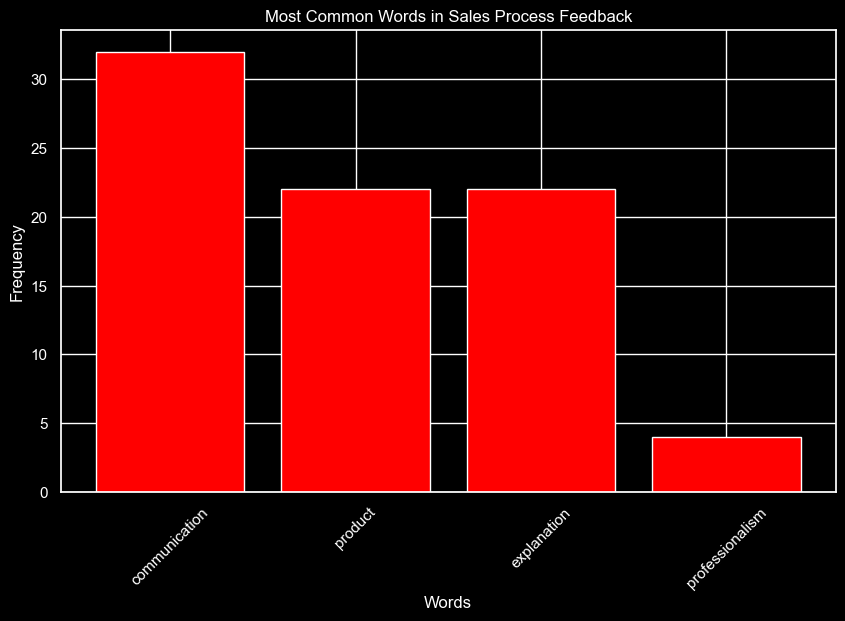

In [129]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/john/Desktop/Tesla/Data/CSAT Data - Confidential.csv')

# Extracting the relevant column
sales_improvement_feedback = df['How can we improve the sales process? Select all that apply'].dropna()

# Using CountVectorizer to analyze the frequency of words
vectorizer = CountVectorizer(stop_words='english', max_features=10)  # Adjust max_features to see more words
word_count = vectorizer.fit_transform(sales_improvement_feedback)
sum_words = word_count.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Visualizing the most common words in red
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in words_freq], [word[1] for word in words_freq], color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Sales Process Feedback')
plt.xticks(rotation=45)
plt.show()
